# Pipelines_project

In [1]:
import pandas as pd
import json
import requests
import src.functions as fn
import src.grafics as gr
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib import colors

Importo el dataset encontrado en Kaggle "Suicide Rates Overview 1985 to 2016".

In [2]:
df=fn.importa('./input/master.csv')

Para completar la información haré scrapping para traer de Wikipedia las capitales de cada país y el número de horas de sol al mes.

Creo la lista de diccionarios llamando a la función "dictHours()", que a su vez llama a "sunnyHours()" para luego poder generar el dataframe. En Wikipedia hay una tabla para cada continente, por lo que hay que repetir esto para cada uno de ellos.

Y por último hay que unificar todo en un único dataframe con la función uniFrame().

In [3]:
urlWikiSunny='https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration'

In [4]:
sunnyHours_dict_global= fn.dictHours(urlWikiSunny)
df_global_index = fn.uniFrame(sunnyHours_dict_global)
display(df_global_index.head())

,country,city,jan,feb,mar,apr,may,jun,jul,ago,sep,oct,nov,dic
0,Afghanistan,Kabul,177.2,178.6,204.5,232.5,310.3,353.4,356.8,339.7,303.9,282.6,253.2,182.4
1,Albania,Tirana,124.0,125.0,165.0,191.0,263.0,298.0,354.0,327.0,264.0,218.0,127.0,88.0
2,Algeria,Algiers,149.0,165.0,202.0,258.0,319.0,318.0,350.0,319.0,237.0,229.0,165.0,136.0
3,Algeria,Tamanrasset,297.6,275.5,322.4,327.0,328.6,306.0,356.5,331.7,288.0,310.0,285.0,272.8
4,Angola,Luanda,219.0,208.0,213.0,199.0,233.0,223.0,175.0,150.0,145.0,164.0,199.0,212.0


Como en el data set no tenemos indicadas las capitales, también crearé un dataframe llamando a la función capitalAPI() que me permita enlazar la información del dataset origen con el dataframe de horas de luz. Esta vez utilizaré la siguiente API: https://restcountries.eu/#api-endpoints-capital-city

En una comprobación posterior se muestran muchos valores nulos para la columna capital debido a que los nombres de los países no están estandarizados. Reemplazamos los nombres de aquellos países que generan problema -->dentro de la función que genera el df_capital.

In [5]:
df_capital = fn.capitalAPI("https://restcountries.eu/rest/v2/all?fields=name;capital")
display(df_capital.head())

,country,capital
0,Afghanistan,Kabul
1,Åland Islands,Mariehamn
2,Albania,Tirana
3,Algeria,Algiers
4,American Samoa,Pago Pago


Llamo a la función mergeOrigenCapital() para unificar la tabla origen 'df' y  'df_capital'

Analizo también el volumen de valores nulos que hay en la columna 'capital' tras cruzar la información. Inicialmente salían en torno a 1400. He reeemplazado los nombre que generaban este problema en la función que gerenra df_capital.

Compruebo desde esta función que países siguen mostrando valores nulos (nullPerColumns()) -->sale Macau, y se eliminan las líneas correspondientes porque este país no existe en df_capital.


In [6]:
df_notNulls=fn.mergeOrigenCapital (df,df_capital)


Con la función mergeNotNullsGlobalIndex(), uno df_global_index y df_notNulls.

Dentro de la función renombro la columna 'city' como 'capital' para poder hacer merge de los dos dataframes.

Al unirlos encontré que muchas capitales no enlazaban con los datos de Wikipedia. Lo revisé con la función nullPerColumns() e incluí los cambios en la función que genera el df_capital.

Los países son: Canada (Ottawa por Toronto), Iceland, Israel (Jerusalem por Tel Aviv), Mongolia( Ulan Bator por Ulaanbaatar), Switzerland (Bern por Zurich), United Arab Emirates (Abu Dhabi por Dubai).

Se eliminan las líneas del resto de países para los que no existe información sobre las horas de luz al mes.

Limpio nombres de columnas, añado una nueva columna 'total' que es la suma anual de horas de luz y las reorganizo para el analisis. 

La función devuelve df_defenitive.


In [7]:
df_definitive=fn.generaDefinitives(df_global_index, df_notNulls)

fn.exportCSV('./output/df_definitive.csv',df_definitive )

display(df_definitive)

,country,year,total,sex,suicides_no,population
0,Albania,1987,2544.0,male,21,312900
1,Albania,1987,2544.0,male,16,308000
2,Albania,1987,2544.0,female,14,289700
3,Albania,1987,2544.0,male,1,21800
4,Albania,1987,2544.0,male,9,274300
...,...,...,...,...,...,...
20441,Uzbekistan,2014,2823.9,female,107,3620833
20442,Uzbekistan,2014,2823.9,female,9,348465
20443,Uzbekistan,2014,2823.9,male,60,2762158
20444,Uzbekistan,2014,2823.9,female,44,2631600


Genero a continuación los dos dataframes que me permitirán devolver un resultado en función de los parámetros introducidos.

In [8]:
df_countryYearTotal = fn.completNoSex(df_definitive)
df_countryYearSex = fn.tabSex(df_definitive)

display(df_countryYearTotal.head())
display(df_countryYearSex.head())

,country,year,suicides_no,population,total,ratio
0,Albania,1987,73,2709600,2544.0,269.412459
1,Albania,1988,63,2764300,2544.0,227.905799
2,Albania,1989,68,2803100,2544.0,242.588563
3,Albania,1992,47,2822500,2544.0,166.519043
4,Albania,1993,73,2807300,2544.0,260.036334


,country,year,sex,suicides_no,population
0,Albania,1987,female,25,1316900
1,Albania,1987,male,48,1392700
2,Albania,1988,female,22,1343600
3,Albania,1988,male,41,1420700
4,Albania,1989,female,15,1363300


# Analisis de datos

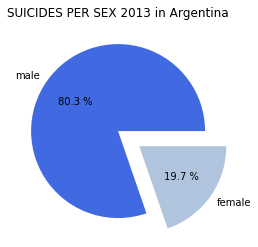

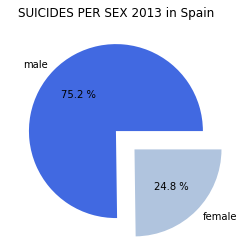

In [9]:
country1= 'Argentina'
country2= 'Spain'
year= 2013
colores1=['royalblue','lightsteelblue']
colores2=['royalblue','lightsteelblue']

gr.generaGraf(country1,year,colores1)
plt.show() 

gr.generaGraf(country2,year,colores2)
plt.show()


Total de personas por país en ese año

<Figure size 432x288 with 0 Axes>

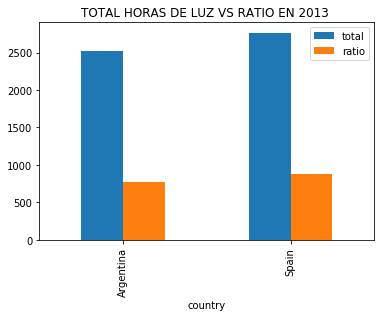

In [10]:
gr.generaBarr(country1,country2,year)

,total,ratio
country,,
Oman,10479.9,116.432722
Bosnia and Herzegovina,3540.0,870.167590
United Arab Emirates,21052.2,1050.559316
Turkey,17147.2,1465.796129
South Africa,64412.0,1645.028512
...,...,...
Finland,53882.0,69308.512238
Kazakhstan,65182.0,70305.463233
Hungary,50128.0,77003.092003


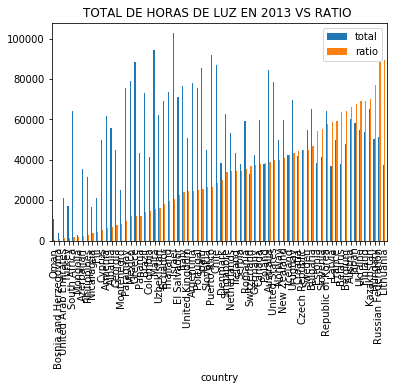

In [11]:


q =(df_countryYearTotal.groupby("country").agg({
        "total":"sum", 
        "ratio":"sum"
}).sort_values(by=['ratio']))

graf_ratio=q.plot.bar()
graf_ratio_title=plt.title(f'TOTAL DE HORAS DE LUZ EN {year} VS RATIO ')

display(q)

Añado una columna para valorar el % de suicidos por país según la población. Para que en el gráfico se vea la comparación entre ratios y total de horas anual por país, multiplico el ratio por 10^5.


In [12]:
df_2014_resto=df_2014[['country','sex','suicides_no', 'population']]
df_2014_agg=df_2014_resto.groupby(by=['country']).sum()
df_2014_agg['ratio']=((df_2014_agg['suicides_no']/df_2014_agg['population'])*100)*100000

df_2014_merge=pd.merge(df_2014_agg, df_2014_total, how='left',on='country')
df_2014_merge.sort_values(by=['ratio'], ascending=False)

NameError: name 'df_2014' is not defined

Valor máximo y mínimo de ratios.

In [ ]:
max_ratio = df_2014_merge.loc[df_2014_merge['ratio'].idxmax()]
min_ratio = df_2014_merge.loc[df_2014_merge['ratio'].idxmin()]
display(max_ratio)
display(min_ratio)

#df_2014_merge[df_2014_merge['ratio']==df_2014_merge['ratio'].min()]

In [ ]:
max_sunny = df_2014_merge.loc[df_2014_merge['total'].idxmax()]
min_sunny = df_2014_merge.loc[df_2014_merge['total'].idxmin()]
display(max_sunny)
display(min_sunny)